AMAN VERMA, 1753

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part A: Data Understanding & Preprocessing

## Task 1: Load and Inspect the Dataset

In [ ]:
import pandas as pd
csv_file_path ="/content/drive/MyDrive/Aman_Verma_1753/Assessment completed/dataset/movies_dataset.csv"
df = pd.read_csv(csv_file_path)
print(df.head())

   MovieID                         Title        Genre  ReleaseYear  \
0        1          Might toward capital       Comedy         2003   
1        2         He however experience       Comedy         1988   
2        3  Star responsibility politics       Comedy         1971   
3        4                  Exactly live       Comedy         1998   
4        5      Focus improve especially  Documentary         2021   

  ReleaseDate Country   BudgetUSD  US_BoxOfficeUSD  Global_BoxOfficeUSD  \
0  28-09-2003   China  6577427.79       6613685.82          15472035.66   
1  14-02-1988     USA  1883810.10       1930949.15           3637731.12   
2  02-11-1971     USA  2468079.29       4186694.69           7165111.24   
3  06-08-1998     USA  1447311.46       2023683.92           4373820.26   
4  17-12-2021   India   900915.86       2129629.10           3113017.38   

   Opening_Day_SalesUSD  One_Week_SalesUSD  IMDbRating  RottenTomatoesScore  \
0            1778530.85         3034053.32       

In [ ]:
df.shape

(999999, 17)

In [ ]:
df.columns

Index(['MovieID', 'Title', 'Genre', 'ReleaseYear', 'ReleaseDate', 'Country',
       'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD',
       'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating',
       'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Director',
       'LeadActor'],
      dtype='object')

Dataset Column Descriptions :



| Column Name              | Description                                                     |
| ------------------------ | --------------------------------------------------------------- |
| **MovieID**              | Unique identifier for each movie (integer from 1 to 999,999)    |
| **Title**                | Synthetic movie title written in natural language style         |
| **Genre**                | Primary genre of the movie (Drama, Action, Comedy, etc.)        |
| **ReleaseYear**          | Year the movie was released (1950–2025)                         |
| **ReleaseDate**          | Full release date within the release year (YYYY-MM-DD)          |
| **Country**              | Country where the movie was produced                            |
| **BudgetUSD**            | Estimated production budget in US dollars (from $100k to $300M) |
| **US_BoxOfficeUSD**      | Gross box office revenue from the US market                     |
| **Global_BoxOfficeUSD**  | Total worldwide box office revenue                              |
| **Opening_Day_SalesUSD** | Estimated US ticket sales on opening day                        |
| **One_Week_SalesUSD**    | Estimated US ticket sales during the first week                 |
| **IMDbRating**           | IMDb rating on a scale of 1.0 to 10.0                           |
| **RottenTomatoesScore**  | Rotten Tomatoes score (0–100 percentage)                        |
| **NumVotesIMDb**         | Number of user votes on IMDb                                    |
| **NumVotesRT**           | Number of user votes on Rotten Tomatoes                         |
| **Director**             | Synthetic name of the movie director                            |
| **LeadActor**            | Synthetic name of the lead actor                                |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MovieID               999999 non-null  int64  
 1   Title                 999999 non-null  object 
 2   Genre                 999999 non-null  object 
 3   ReleaseYear           999999 non-null  int64  
 4   ReleaseDate           999999 non-null  object 
 5   Country               999999 non-null  object 
 6   BudgetUSD             999999 non-null  float64
 7   US_BoxOfficeUSD       999999 non-null  float64
 8   Global_BoxOfficeUSD   999999 non-null  float64
 9   Opening_Day_SalesUSD  999999 non-null  float64
 10  One_Week_SalesUSD     999999 non-null  float64
 11  IMDbRating            999999 non-null  float64
 12  RottenTomatoesScore   999999 non-null  int64  
 13  NumVotesIMDb          999999 non-null  int64  
 14  NumVotesRT            999999 non-null  int64  
 15  

### Numerical Columns:
*   `MovieID`
*   `ReleaseYear`
*   `BudgetUSD`
*   `US_BoxOfficeUSD`
*   `Global_BoxOfficeUSD`
*   `Opening_Day_SalesUSD`
*   `One_Week_SalesUSD`
*   `IMDbRating`
*   `RottenTomatoesScore`
*   `NumVotesIMDb`
*   `NumVotesRT`

### Categorical Columns:
*   `Title`
*   `Genre`
*   `ReleaseDate`
*   `Country`
*   `Director`
*   `LeadActor`

## Task 2: Handling Missing Values

In [ ]:
df.isnull().sum()

,0
MovieID,0
Title,0
Genre,0
ReleaseYear,0
ReleaseDate,0
Country,0
BudgetUSD,0
US_BoxOfficeUSD,0
Global_BoxOfficeUSD,0
Opening_Day_SalesUSD,0


Dropping rows blindly in a small dataset can be risky for several reasons:

* **Loss of Information**: Even a few rows in a small dataset can represent a significant portion of the total data. Removing them can lead to a substantial loss of valuable information.

* **Reduced Statistical Power**: Smaller datasets inherently have less statistical power. Dropping data further reduces the sample size, making it harder to detect statistically significant relationships or patterns. Your models might fail to generalize well to new data.

* **Bias Introduction**: If the rows you drop are not missing completely at random, you might inadvertently introduce bias into your dataset. For example, if missing values are more prevalent in a specific subgroup, dropping those rows could lead to underrepresentation of that group.

* **Skewed Distributions**: Removing data can alter the distribution of your variables, leading to an inaccurate representation of the underlying population. This can negatively impact any subsequent analysis or model training.

* **Difficulty in Generalization**: Models trained on significantly reduced or biased small datasets may not generalize well to unseen data, making them less reliable in real-world applications.

## Task 3: Removing Duplicates & Outliers

In [ ]:
# Check for duplicates in the datset
duplicate_rows = df[df.duplicated(keep=False)]

print(f"Number of duplicate movie entries: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("\nDuplicate movie entries (showing first 5 if any):")
    display(duplicate_rows.head())

Number of duplicate movie entries: 0


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Detecting outliers for '{column}' column:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers in '{column}': {len(outliers)}")
    if not outliers.empty:
        print(f" number of outliners in the  '{column}' column is : ",outliers.shape[0])
    else:
        print(f"  No outliers detected in '{column}' based on IQR method.")
    return lower_bound, upper_bound
# Detect outliers for 'BudgetUSD'
lower_bound_budget, upper_bound_budget = detect_outliers_iqr(df, 'BudgetUSD')
print()
# Detect outliers for 'Global_BoxOfficeUSD'
lower_bound_global_box_office, upper_bound_global_box_office = detect_outliers_iqr(df, 'Global_BoxOfficeUSD')


Detecting outliers for 'BudgetUSD' column:
  Q1: 1190510.79, Q3: 9002790.96, IQR: 7812280.17
  Lower Bound: -10527909.46, Upper Bound: 20721211.20
  Number of outliers in 'BudgetUSD': 109157
 number of outliners in the  'BudgetUSD' column is :  109157

Detecting outliers for 'Global_BoxOfficeUSD' column:
  Q1: 2762369.99, Q3: 23552451.20, IQR: 20790081.21
  Lower Bound: -28422751.83, Upper Bound: 54737573.02
  Number of outliers in 'Global_BoxOfficeUSD': 113298
 number of outliners in the  'Global_BoxOfficeUSD' column is :  113298


In [ ]:
# Cap outliers in 'BudgetUSD' column
df['BudgetUSD'] = df['BudgetUSD'].clip(upper=upper_bound_budget)
print(f"Outliers in 'BudgetUSD' column have been capped. Number of outliers after capping: {len(df[df['BudgetUSD'] > upper_bound_budget])}")

# Cap outliers in 'Global_BoxOfficeUSD' column
df['Global_BoxOfficeUSD'] = df['Global_BoxOfficeUSD'].clip(upper=upper_bound_global_box_office)
print(f"Outliers in 'Global_BoxOfficeUSD' column have been capped. Number of outliers after capping: {len(df[df['Global_BoxOfficeUSD'] > upper_bound_global_box_office])}")

print("\nDescriptive statistics for capped columns:")
print(df[['BudgetUSD', 'Global_BoxOfficeUSD']].describe())

Outliers in 'BudgetUSD' column have been capped. Number of outliers after capping: 0
Outliers in 'Global_BoxOfficeUSD' column have been capped. Number of outliers after capping: 0

Descriptive statistics for capped columns:
          BudgetUSD  Global_BoxOfficeUSD
count  9.999990e+05         9.999990e+05
mean   6.229199e+06         1.622888e+07
std    6.711052e+06         1.798812e+07
min    1.000000e+05         1.000000e+05
25%    1.190511e+06         2.762370e+06
50%    3.265790e+06         8.090223e+06
75%    9.002791e+06         2.355245e+07
max    2.072121e+07         5.473757e+07


Capping was chosen for 'BudgetUSD' and 'Global_BoxOfficeUSD' over other methods like removing or transforming outliers for several key reasons, which are particularly relevant to movie financial data:

* Preservation of Data: Removing outliers, especially when dealing with hundreds of thousands of entries, could lead to significant data loss and reduce the statistical power of our analysis. Capping retains all data points.
* Nature of Movie Industry Data: In the film industry, exceptionally high budgets (blockbusters) and massive box office revenues are legitimate data points, not errors. They represent a real segment of the market. Removing them would distort the overall picture.
* Mitigating Extreme Influence: While these high values are legitimate, their extreme nature can disproportionately influence statistical models or visualizations, leading to skewed results. Capping limits this extreme influence by bringing these values down to a more defined upper bound (the IQR upper fence) while still acknowledging their high magnitude.
* Interpretability: Capping maintains the original scale of the data for most values, and the capped values are still interpretable as high-end figures within a reasonable range. Transformations like log scaling, while effective for skewness, can make interpretation less straightforward.


In essence, capping offers a balanced approach: it addresses the statistical issues caused by extreme values without sacrificing valuable, legitimate information about the blockbuster phenomenon in the movie industry.



---



Outliers are very common in movie budget and revenue data for several reasons, reflecting the unique economics and creative nature of the film industry:

* **Blockbusters and Tentpoles**: A small number of films are produced with exceptionally high budgets (e.g., superhero movies, major sci-fi franchises) and are designed to generate massive global revenue. These films inherently create outliers at the high end of both budget and revenue distributions.
* **Independent and Low-Budget Films**: Conversely, there's a vast number of independent or niche films made on very tight budgets. While most don't achieve mainstream success, some might unexpectedly break out, creating revenue outliers (e.g., The Blair Witch Project). More often, their low budgets make them outliers at the lower end.
* **Marketing and Distribution Costs**: Beyond production, significant portions of a film's budget go into marketing and distribution. For some films, these costs can balloon, contributing to higher overall budgets.
* **Star Power and Special Effects**: Movies featuring A-list actors or extensive special effects tend to have much higher budgets due to talent fees and production demands, pushing them into outlier territory.
* **Unexpected Success or Failure:** Sometimes, a film with an average budget can become a cultural phenomenon and earn astronomical revenue (a positive outlier). Conversely, a high-budget film can flop spectacularly, resulting in a large budget outlier with low revenue.
* **Inflation and Industry Growth**: Over decades, the cost of filmmaking has generally increased due to inflation, technological advancements, and rising expectations for spectacle. Older films might appear as low-budget outliers compared to modern productions, even if they were considered high-budget at their time.
* **Global Market Expansion**: The expansion of the global film market means that successful films can now earn revenue from many more territories, increasing their potential box office and creating higher revenue outliers.


These factors combine to create highly skewed distributions for both budget and revenue, where a small number of films deviate significantly from the average, appearing as statistical outliers.

# Part B: Feature Engineering

## Task 4: Feature Selection & Transformation

In [ ]:
# Convert 'Genre' column using one-hot encoding
genre_dummies = pd.get_dummies(df['Genre'], prefix='Genre')
# Concatenate the new genre columns with the original DataFrame
df = pd.concat([df, genre_dummies], axis=1)
# Drop the original 'Genre' column as it's now encoded
df.drop('Genre', axis=1, inplace=True)
#The 'IMDbRating' column is already numerical and does not require encoding.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding MovieID as it's an identifier)
numerical_cols_to_scale = [
    'ReleaseYear',
    'BudgetUSD',
    'US_BoxOfficeUSD',
    'Global_BoxOfficeUSD',
    'Opening_Day_SalesUSD',
    'One_Week_SalesUSD',
    'IMDbRating',
    'RottenTomatoesScore',
    'NumVotesIMDb',
    'NumVotesRT'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("Numerical features scaled successfully.")
print("DataFrame head with scaled numerical features:")
display(df[numerical_cols_to_scale].head())

Numerical features scaled successfully.
DataFrame head with scaled numerical features:


,ReleaseYear,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT
0,0.259531,0.051889,-0.215186,-0.042075,-0.149305,-0.227551,-0.198429,-0.385189,-0.051046,1.015503
1,-0.519251,-0.647498,-0.335894,-0.699971,-0.337615,-0.340177,-0.871556,-1.180984,-0.298093,-0.214846
2,-1.401870,-0.560437,-0.277747,-0.503876,-0.259983,-0.271669,-0.669618,-0.555717,-0.178923,0.684556
3,-0.000063,-0.712539,-0.333504,-0.659050,-0.297831,-0.336748,0.542009,1.263244,-0.267639,-0.033306
4,1.194069,-0.793957,-0.330773,-0.729141,-0.323588,-0.338646,-0.265742,0.126394,-0.143734,-0.158285


In [ ]:
# Drop irrelevant columns for supervised learning
columns_to_drop = ['MovieID', 'Title', 'ReleaseDate', 'Country', 'Director', 'LeadActor']
df.drop(columns=columns_to_drop, inplace=True)

print(f"Columns {columns_to_drop} dropped successfully.")
print("\nCurrent DataFrame columns:")
print(df.columns)

Columns ['MovieID', 'Title', 'ReleaseDate', 'Country', 'Director', 'LeadActor'] dropped successfully.

Current DataFrame columns:
Index(['ReleaseYear', 'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD',
       'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating',
       'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Genre_Action',
       'Genre_Comedy', 'Genre_Documentary', 'Genre_Drama', 'Genre_Horror',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller'],
      dtype='object')


Machine learning models typically can't directly process text categories because they are fundamentally mathematical algorithms that operate on numerical data. Here's a breakdown of the key reasons:

* **Mathematical Operations:** Most ML algorithms are built upon mathematical operations like addition, multiplication, distance calculations, and gradient descent. These operations are meaningless with raw text strings.

* **Lack of Order/Magnitude:** Text categories often don't have an inherent numerical order or magnitude. For example, 'Action', 'Comedy', and 'Drama' are distinct categories, but one isn't 'greater' or 'less' than another in a mathematical sense. Assigning arbitrary numbers (e.g., Action=1, Comedy=2, Drama=3) could imply an order that doesn't exist, misleading the model.

* **High Dimensionality and Sparsity:** If each unique text category were treated as a separate feature without encoding, it would lead to an extremely high-dimensional and sparse dataset (many zeros), which can be computationally expensive and negatively impact model performance.

* **No Semantic Meaning:** ML models don't understand the semantic meaning of words. They learn patterns from the numerical representations provided. 'Action' means nothing to a computer until it's translated into a form that can be processed mathematically.

To overcome this, text categories are converted into numerical representations through techniques like:

* **One-Hot Encoding:** Creates a new binary column for each category. (e.g., 'Action' becomes [1, 0, 0], 'Comedy' becomes [0, 1, 0]).
Label Encoding: Assigns a unique integer to each category (e.g., Action=0, Comedy=1, Drama=2). This can be problematic if the integers imply an artificial order, but it's sometimes used for ordinal categories or when the model doesn't assume ordinality (e.g., decision trees).
Target Encoding/Feature Hashing: More advanced techniques that can capture relationships or reduce dimensionality.

# Part C: Supervised Learning – Regression

## Task 5: Train-Test Split

In [ ]:
# Target variable
y = df["Global_BoxOfficeUSD"]
# Feature variables
X = df[[
        "BudgetUSD",
        "NumVotesRT",
        "NumVotesIMDb",
        "IMDbRating",
        "Genre_Action",
        "Genre_Comedy",
        "Genre_Documentary",
        "Genre_Drama",
        "Genre_Horror",
        "Genre_Romance",
        "Genre_Sci-Fi",
        "Genre_Thriller"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 80% training, 20% testing
    random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (799999, 12)
X_test shape: (200000, 12)
y_train shape: (799999,)
y_test shape: (200000,)


If you train and test a machine learning model on the same data, the primary issue you will face is overfitting.

Here's why and what it means:

* **Overfitting**: The model learns the training data, including its noise and specific quirks, too well. It essentially memorizes the training examples rather than learning generalized patterns.
* **Misleading Performance Metrics**: When evaluated on the same data it was trained on, the model will likely show excellent performance metrics (e.g., high accuracy, low error). This gives a false sense of security about the model's capabilities.
* **Poor Generalization**: The model will fail to perform well on new, unseen data because it hasn't learned the underlying relationships but rather the specifics of the training set. Its ability to generalize to real-world scenarios will be very low.
* **Lack of Real-World Value**: A model that overfits is not useful in practice because its purpose is to make predictions or classifications on data it hasn't encountered before. If it can't do this reliably, it has no practical value.


To avoid this, it's crucial to split your dataset into at least two parts: a training set (used to train the model) and a testing set (used to evaluate the model's performance on unseen data). This provides an unbiased estimate of the model's generalization ability.

## Task 6: Build a Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize the model
lr_model = LinearRegression()
# Train the model on training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on test data
y_pred = lr_model.predict(X_test)
# View first 10 predictions
y_pred[:10]


array([-0.70252607, -0.66858438, -0.63434255,  1.97841442, -0.7202455 ,
       -0.34645026, -0.55022149, -0.64699951,  1.97840266, -0.13181753])

BudgetUSD is expected to have the strongest impact on movie revenue because it directly affects production quality, marketing reach, and distribution scale.

## Task 7: Regression Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.2600
Mean Squared Error (MSE): 0.1612
Root Mean Squared Error (RMSE): 0.4015
R2 Score: 0.8392


A high R2 score, while indicating a good fit of the model to the training data, is generally not enough to fully trust a model on its own. Here's why:

Why a High R2 Score Alone is Insufficient:
* **Overfitting**: A high R2 score can often be a symptom of overfitting. An overly complex model might capture noise in the training data, leading to a high R2 on the training set but poor performance on new, unseen data. If the model hasn't been rigorously validated (e.g., with a test set or cross-validation), a high R2 can be misleading.
* **Lack of Interpretability/Causality**: R2 tells you how much variance in the dependent variable is explained by the independent variables, but it doesn't imply causality. It also doesn't tell you how the independent variables are influencing the dependent variable, or if the relationships make logical sense in the real world.
* **Model Assumptions**: Most regression models (like Linear Regression) rely on certain assumptions (e.g., linearity, independence of errors, homoscedasticity, normality of residuals). A high R2 doesn't guarantee these assumptions are met. Violations of these assumptions can lead to biased or inefficient estimates, making the model unreliable despite a good fit.
* **Influence of Outliers**: A few influential outliers can significantly inflate the R2 score, giving a false impression of a good fit, even if the model performs poorly for the majority of data points.
* **Multicollinearity**: If independent variables are highly correlated with each other (multicollinearity), the R2 score might be high, but the individual coefficients of the predictors become unstable and difficult to interpret.
* **Context and Domain Knowledge**: A model's trustworthiness also depends on whether its findings align with domain expertise and theoretical understanding. A statistically significant model with a high R2 might still be practically useless if its predictions are illogical or unusable in a real-world context.


What Else to Consider for Trustworthiness:


To truly trust a model, especially one with a high R2, you should also consider:

* **Performance on a Separate Test Set/Cross-Validation**: This is crucial to assess the model's generalization ability and detect overfitting.
* **Residual Analysis**: Examining residual plots for patterns (e.g., non-randomness, heteroscedasticity) helps check model assumptions and identify issues.
* **Other Evaluation Metrics**: Depending on the problem, other metrics like MAE, MSE, RMSE (for regression) can provide a more nuanced view of prediction accuracy, especially if you care about the magnitude of errors.
* **Feature Importance and Interpretability**: Understanding which features contribute most to the predictions and if their influence is sensible.
* **Robustness**: How well the model performs when confronted with slight variations or noise in the input data.
* **Bias and Fairness**: Ensuring the model does not produce systematically unfair or biased outcomes for different subgroups of data.


In summary, a high R2 is a good starting point, but it should always be considered alongside other diagnostic checks and domain knowledge to establish true model trustworthiness.

#  Part D: Supervised Learning – Classification

## Task 8: Create Target Labels

In [ ]:
# Calculate average global box office revenue
avg_revenue = df["Global_BoxOfficeUSD"].mean()
# Create movie_success column
df["movie_success"] = df["Global_BoxOfficeUSD"].apply(
    lambda x: "Hit Movie" if x > avg_revenue else "Flop Movie")

In [ ]:
# Encode movie_success column numerically
df["movie_success_encoded"] = df["movie_success"].map(
    {"Flop Movie": 0, "Hit Movie": 1})


In [ ]:
df[["Global_BoxOfficeUSD", "movie_success", "movie_success_encoded"]].tail()

,Global_BoxOfficeUSD,movie_success,movie_success_encoded
999994,-0.756309,Flop Movie,0
999995,-0.781866,Flop Movie,0
999996,2.140786,Hit Movie,1
999997,-0.592683,Flop Movie,0
999998,1.038433,Hit Movie,1


Classification helps producers identify whether a movie is likely to be a hit or a flop, enabling better budgeting, marketing, and risk management decisions

## Task 9: Build a Classification Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Define target variable for classification
y_clf = df["movie_success_encoded"]
# Define features for classification (using similar features as regression, but excluding Global_BoxOfficeUSD)
X_clf = df[[
    "BudgetUSD",
    "NumVotesRT",
    "NumVotesIMDb",
    "IMDbRating",
    "Genre_Action",
    "Genre_Comedy",
    "Genre_Documentary",
    "Genre_Drama",
    "Genre_Horror",
    "Genre_Romance",
    "Genre_Sci-Fi",
    "Genre_Thriller"
]]
# Split data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf,
    y_clf,
    test_size=0.2,  # 80% training, 20% testing
    random_state=42
)
print("X_train_clf shape:", X_train_clf.shape)
print("X_test_clf shape:", X_test_clf.shape)
print("y_train_clf shape:", y_train_clf.shape)
print("y_test_clf shape:", y_test_clf.shape)
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_clf, y_train_clf)

X_train_clf shape: (799999, 12)
X_test_clf shape: (200000, 12)
y_train_clf shape: (799999,)
y_test_clf shape: (200000,)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
# Predict hit/flop on the test data
y_pred_clf = log_reg_model.predict(X_test_clf)

print("First 10 predictions for movie success (0 = Flop, 1 = Hit):")
print(y_pred_clf[:10])

First 10 predictions for movie success (0 = Flop, 1 = Hit):
[0 0 0 1 0 0 0 0 1 0]


## Task 10: Classification Evaluation

Accuracy: 0.8925
Precision: 0.8793
Recall: 0.7833

Confusion Matrix:


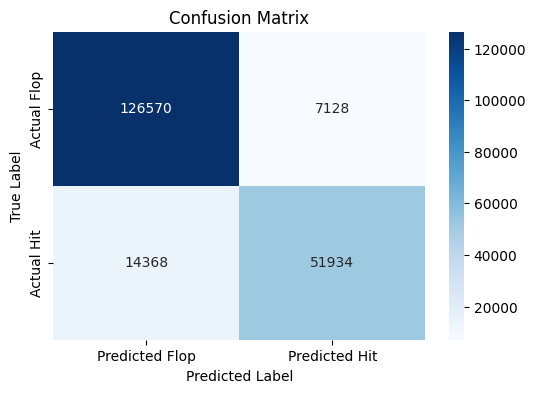

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nConfusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Flop', 'Predicted Hit'],
            yticklabels=['Actual Flop', 'Actual Hit'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

For a movie producer, predicting a **flop as a hit (False Positive)** is generally worse than predicting a **hit as a flop (False Negative)**. Here's why:

**Predicting a Flop as a Hit (False Positive):**
This is often the more damaging scenario for a producer, leading to significant financial losses. If a model incorrectly predicts a movie will be a hit, the producer might:

* **Over-invest in Marketing**: Spend excessively on advertising, promotions, and distribution, assuming a large return that will never materialize.
Higher Production Budget: Justify a larger budget, more expensive talent, and elaborate production values based on the false expectation of blockbuster success.
* **Larger Scale Release**: Opt for a wide release in many theaters, incurring higher costs for prints and marketing, when a limited release might have been more appropriate.
* **Opportunity Cost**: Allocate resources (time, money, personnel) to a failing project that could have been used on a potentially successful film.
* **Reputational Damage**: A highly anticipated film that bombs can damage the studio's or producer's reputation, affecting future deals and audience trust.


**Predicting a Hit as a Flop (False Negative):**

While not ideal, this scenario usually results in missed opportunities rather than direct losses.

* **Under-investment in Marketing:** Spend less on advertising, potentially limiting the film's reach and initial box office performance.
* **Smaller Scale Release:** Opt for a more limited release, which means fewer initial screens and lower opening weekend revenue.
* **Missed Revenue Potential:** The film might still become a hit through strong word-of-mouth, but its overall revenue potential could be capped due to initial conservative decisions. However, producers can often adjust strategy (e.g., expand release, increase marketing) if early results are surprisingly positive.
* **Lower Expectations:** While it means less initial hype, it also means the film can exceed expectations, potentially benefiting from positive press if it performs well despite initial predictions.


In summary: A False Positive (flop predicted as a hit) directly leads to overspending and financial deficits, which can be catastrophic for a production company. A False Negative (hit predicted as a flop) leads to foregone profits and missed opportunities, which are undesirable but typically less financially damaging than active losses.

# Part E: Model Comparison

## Task 11: Compare Models

In [ ]:
df_sample = df.sample(frac=0.1, random_state=42)


Linear Regression vs Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
# Features & target
X = df_sample[["BudgetUSD","NumVotesRT","NumVotesIMDb","IMDbRating",
        "Genre_Action","Genre_Comedy", "Genre_Documentary",
        "Genre_Drama","Genre_Horror", "Genre_Romance",
        "Genre_Sci-Fi","Genre_Thriller"]]
y = df_sample["Global_BoxOfficeUSD"]
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# Models (lightweight RF)
lr = LinearRegression()
rf = RandomForestRegressor(
    n_estimators=20,
    max_depth=10,
    n_jobs=-1,
    random_state=42)
# Train
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
# Predict
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
# Comparison table
regression_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "R2": [r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf) ],
    "MAE": [mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))]})
regression_comparison

,Model,R2,MAE,RMSE
0,Linear Regression,0.834439,0.261680,0.403396
1,Random Forest Regressor,0.837381,0.260979,0.399797


Logistic Regression vs Decision Tree

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Classification target
y_class = df_sample["movie_success_encoded"]
# Split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42)
# Models (lightweight tree)
log_reg = LogisticRegression(max_iter=500)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
# Train
log_reg.fit(Xc_train, yc_train)
dt.fit(Xc_train, yc_train)
# Predict
y_pred_log = log_reg.predict(Xc_test)
y_pred_dt = dt.predict(Xc_test)
# Comparison table
classification_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_score(yc_test, y_pred_log),
        accuracy_score(yc_test, y_pred_dt)],
    "Precision": [precision_score(yc_test, y_pred_log),
        precision_score(yc_test, y_pred_dt)],
    "Recall": [recall_score(yc_test, y_pred_log),
        recall_score(yc_test, y_pred_dt)],
    "F1 Score": [ f1_score(yc_test, y_pred_log),
        f1_score(yc_test, y_pred_dt)]})
classification_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.89005,0.875128,0.776562,0.822904
1,Decision Tree,0.89065,0.817341,0.859705,0.837988


# Final Business Interpretation

## Task 12: Insight & Recommendations

**How can this model help investors or producers?**

This model helps investors and producers reduce uncertainty by providing data-driven predictions about a movie’s financial performance. Instead of relying only on intuition or past experience, they can estimate whether a movie is likely to be profitable and how successful it might be at the box office. This makes planning more informed, lowers financial risk, and improves confidence before committing large budgets.

**What decisions can be improved using ML predictions?**

Machine learning predictions can improve several key decisions, such as:

* Budget allocation: deciding how much money to invest in production and marketing
* Project selection: choosing which movie ideas or scripts are worth funding
* Marketing strategy: adjusting promotion intensity based on predicted success
* Release planning: selecting optimal release timing and scale
* Risk management: balancing high-risk and low-risk projects in a production portfolio

Overall, ML helps stakeholders make smarter, faster, and more objective decisions.

# Bonus

In [ ]:
# Target variable (IMDb score)
y = df["IMDbRating"]

# Feature variables
X = df[
    [
        "BudgetUSD",
        "NumVotesRT",
        "NumVotesIMDb",
        "RottenTomatoesScore",
        "Genre_Action",
        "Genre_Comedy",
        "Genre_Documentary",
        "Genre_Drama",
        "Genre_Horror",
        "Genre_Romance",
        "Genre_Sci-Fi",
        "Genre_Thriller"
    ]
]


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# First 10 predicted IMDb scores
y_pred[:10]


array([-0.48207928, -0.31355899, -0.78965611,  0.26192528, -0.80508193,
        1.97015258, -0.56572412, -0.64680721, -0.70319189, -0.76987149])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(Xc_train, yc_train)

y_pred_knn = knn.predict(Xc_test)

knn_accuracy = accuracy_score(yc_test, y_pred_knn)
knn_accuracy


0.88345

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(Xc_train, yc_train)

y_pred_rf = rf_clf.predict(Xc_test)


In [ ]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": Xc_train.columns,
    "Importance": rf_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
0,BudgetUSD,0.978011
2,NumVotesIMDb,0.007749
1,NumVotesRT,0.007056
3,IMDbRating,0.005422
4,Genre_Action,0.000251
7,Genre_Drama,0.000247
8,Genre_Horror,0.000234
10,Genre_Sci-Fi,0.000221
6,Genre_Documentary,0.000218
5,Genre_Comedy,0.000210
